In [1]:
import pandas as pd

In [2]:
import pandas_profiling

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [24]:
i  = pd.read_excel(r"C:\Users\LENOVO\Downloads\Covid cases in India.xlsx")
i.tail()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
21,22,West Bengal,11,0,0,1
22,23,Bihar,7,0,0,1
23,24,Mizoram,1,0,0,0
24,25,Goa,6,0,0,0
25,26,Manipur,1,0,0,0


In [7]:
i.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0


In [8]:
i.size

156

In [9]:
i.ndim

2

In [10]:
i.dtypes

S. No.                                         int64
Name of State / UT                            object
Total Confirmed cases (Indian National)        int64
Total Confirmed cases ( Foreign National )     int64
Cured                                          int64
Death                                          int64
dtype: object

In [11]:
i.isnull().sum()

S. No.                                        0
Name of State / UT                            0
Total Confirmed cases (Indian National)       0
Total Confirmed cases ( Foreign National )    0
Cured                                         0
Death                                         0
dtype: int64

In [12]:
i.isna().sum()

S. No.                                        0
Name of State / UT                            0
Total Confirmed cases (Indian National)       0
Total Confirmed cases ( Foreign National )    0
Cured                                         0
Death                                         0
dtype: int64

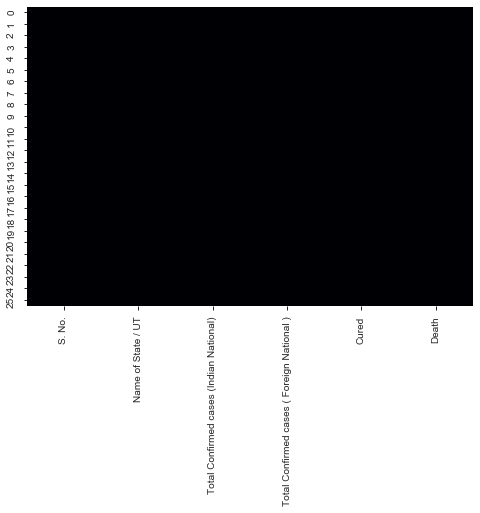

In [13]:
sns.heatmap(i.isnull(),cbar=False,cmap='inferno')

In [14]:
i.isnull().describe()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
count,26,26,26,26,26,26
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,26,26,26,26,26,26


In [15]:
i.columns

Index(['S. No.', 'Name of State / UT',
       'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )', 'Cured', 'Death'],
      dtype='object')

In [16]:
i.drop(['S. No.'],axis=1,inplace=True)

In [17]:
i.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0


In [18]:
i.isna().describe()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
count,26,26,26,26,26
unique,1,1,1,1,1
top,False,False,False,False,False
freq,26,26,26,26,26


In [19]:
pandas_profiling.ProfileReport(i)

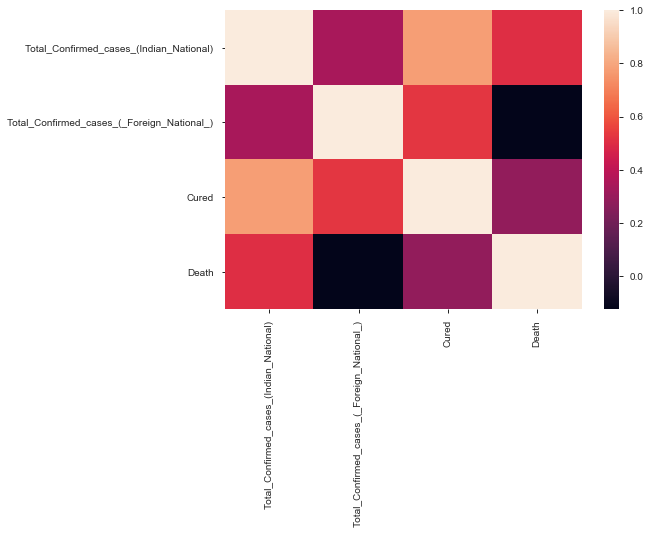

In [20]:
sns.heatmap(i.corr())

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


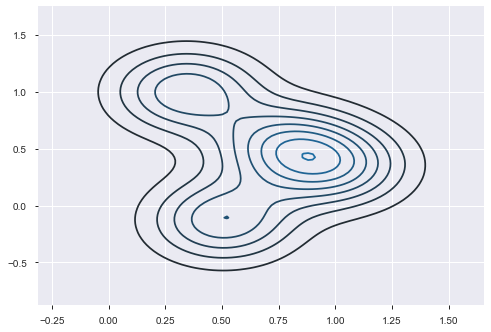

In [21]:
sns.kdeplot(i.corr())

In [22]:
i.columns

Index(['Name_of_State_/_UT', 'Total_Confirmed_cases_(Indian_National)',
       'Total_Confirmed_cases_(_Foreign_National_)', 'Cured', 'Death'],
      dtype='object')

In [25]:
total_cases= i['Total Confirmed cases (Indian National)']+i['Total Confirmed cases ( Foreign National )']
pd.DataFrame(total_cases)

,0
0,12
1,6
2,39
3,43
4,30
5,4
6,20
7,138
8,23
9,147


In [26]:
i['total_cases'] = total_cases.values

In [27]:
i=i.assign(total_cases=total_cases.values)

In [28]:
i.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,total_cases
0,1,Andhra Pradesh,12,0,1,0,12
1,2,Chhattisgarh,6,0,0,0,6
2,3,Delhi,38,1,6,1,39
3,4,Gujarat,43,0,0,3,43
4,5,Haryana,16,14,11,0,30


In [29]:
x = i['Name of State / UT']
y= i['total_cases']

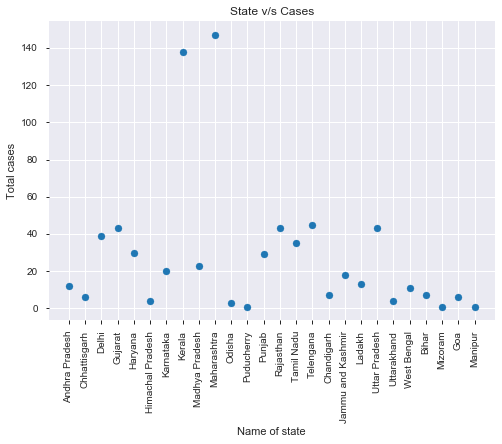

In [30]:
plt.scatter(x,y)
plt.xlabel("Name of state")
plt.ylabel("Total cases")
plt.title("State v/s Cases")
plt.xticks(rotation=90)
plt.show()

In [31]:
i['total_cases'].sum()

729

In [32]:
activecases = i["total_cases"]-(i['Cured']+i['Death'])
activecases

0      11
1       6
2      32
3      40
4      19
5       3
6      15
7     127
8      22
9     128
10      3
11      1
12     28
13     40
14     33
15     44
16      7
17     16
18     13
19     32
20      4
21     10
22      6
23      1
24      6
25      1
dtype: int64

In [33]:
i["activecases"]=activecases.values
i = i.assign(activecases=activecases.values)
i.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,total_cases,activecases
0,1,Andhra Pradesh,12,0,1,0,12,11
1,2,Chhattisgarh,6,0,0,0,6,6
2,3,Delhi,38,1,6,1,39,32
3,4,Gujarat,43,0,0,3,43,40
4,5,Haryana,16,14,11,0,30,19


In [34]:
i.style.background_gradient(cmap='inferno')

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,total_cases,activecases
0,1,Andhra Pradesh,12,0,1,0,12,11
1,2,Chhattisgarh,6,0,0,0,6,6
2,3,Delhi,38,1,6,1,39,32
3,4,Gujarat,43,0,0,3,43,40
4,5,Haryana,16,14,11,0,30,19
5,6,Himachal Pradesh,4,0,0,1,4,3
6,7,Karnataka,20,0,3,2,20,15
7,8,Kerala,131,7,11,0,138,127
8,9,Madhya Pradesh,23,0,0,1,23,22
9,10,Maharashtra,144,3,15,4,147,128


In [35]:
Total_active_cases=i.groupby('Name of State / UT')['activecases'].sum().sort_values(ascending=False)

In [36]:
pd.DataFrame(Total_active_cases)

,activecases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [37]:
i['Total_active_cases'] = Total_active_cases.values
i = i.assign(Total_active_cases=Total_active_cases.values)
i.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,total_cases,activecases,Total_active_cases
0,1,Andhra Pradesh,12,0,1,0,12,11,128
1,2,Chhattisgarh,6,0,0,0,6,6,127
2,3,Delhi,38,1,6,1,39,32,44
3,4,Gujarat,43,0,0,3,43,40,40
4,5,Haryana,16,14,11,0,30,19,40


In [38]:
i.style.background_gradient(cmap="Reds")

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,total_cases,activecases,Total_active_cases
0,1,Andhra Pradesh,12,0,1,0,12,11,128
1,2,Chhattisgarh,6,0,0,0,6,6,127
2,3,Delhi,38,1,6,1,39,32,44
3,4,Gujarat,43,0,0,3,43,40,40
4,5,Haryana,16,14,11,0,30,19,40
5,6,Himachal Pradesh,4,0,0,1,4,3,33
6,7,Karnataka,20,0,3,2,20,15,32
7,8,Kerala,131,7,11,0,138,127,32
8,9,Madhya Pradesh,23,0,0,1,23,22,28
9,10,Maharashtra,144,3,15,4,147,128,22


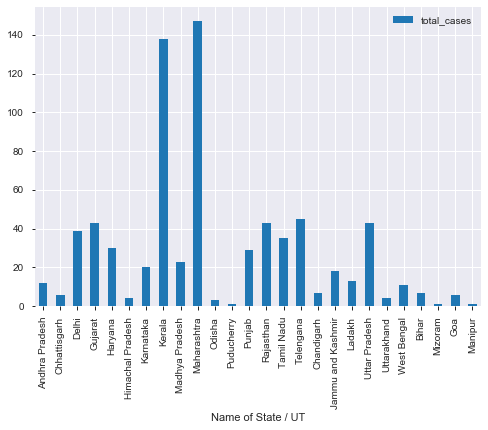

In [39]:
i.plot(kind='bar',x='Name of State / UT',y='total_cases')
plt.show()

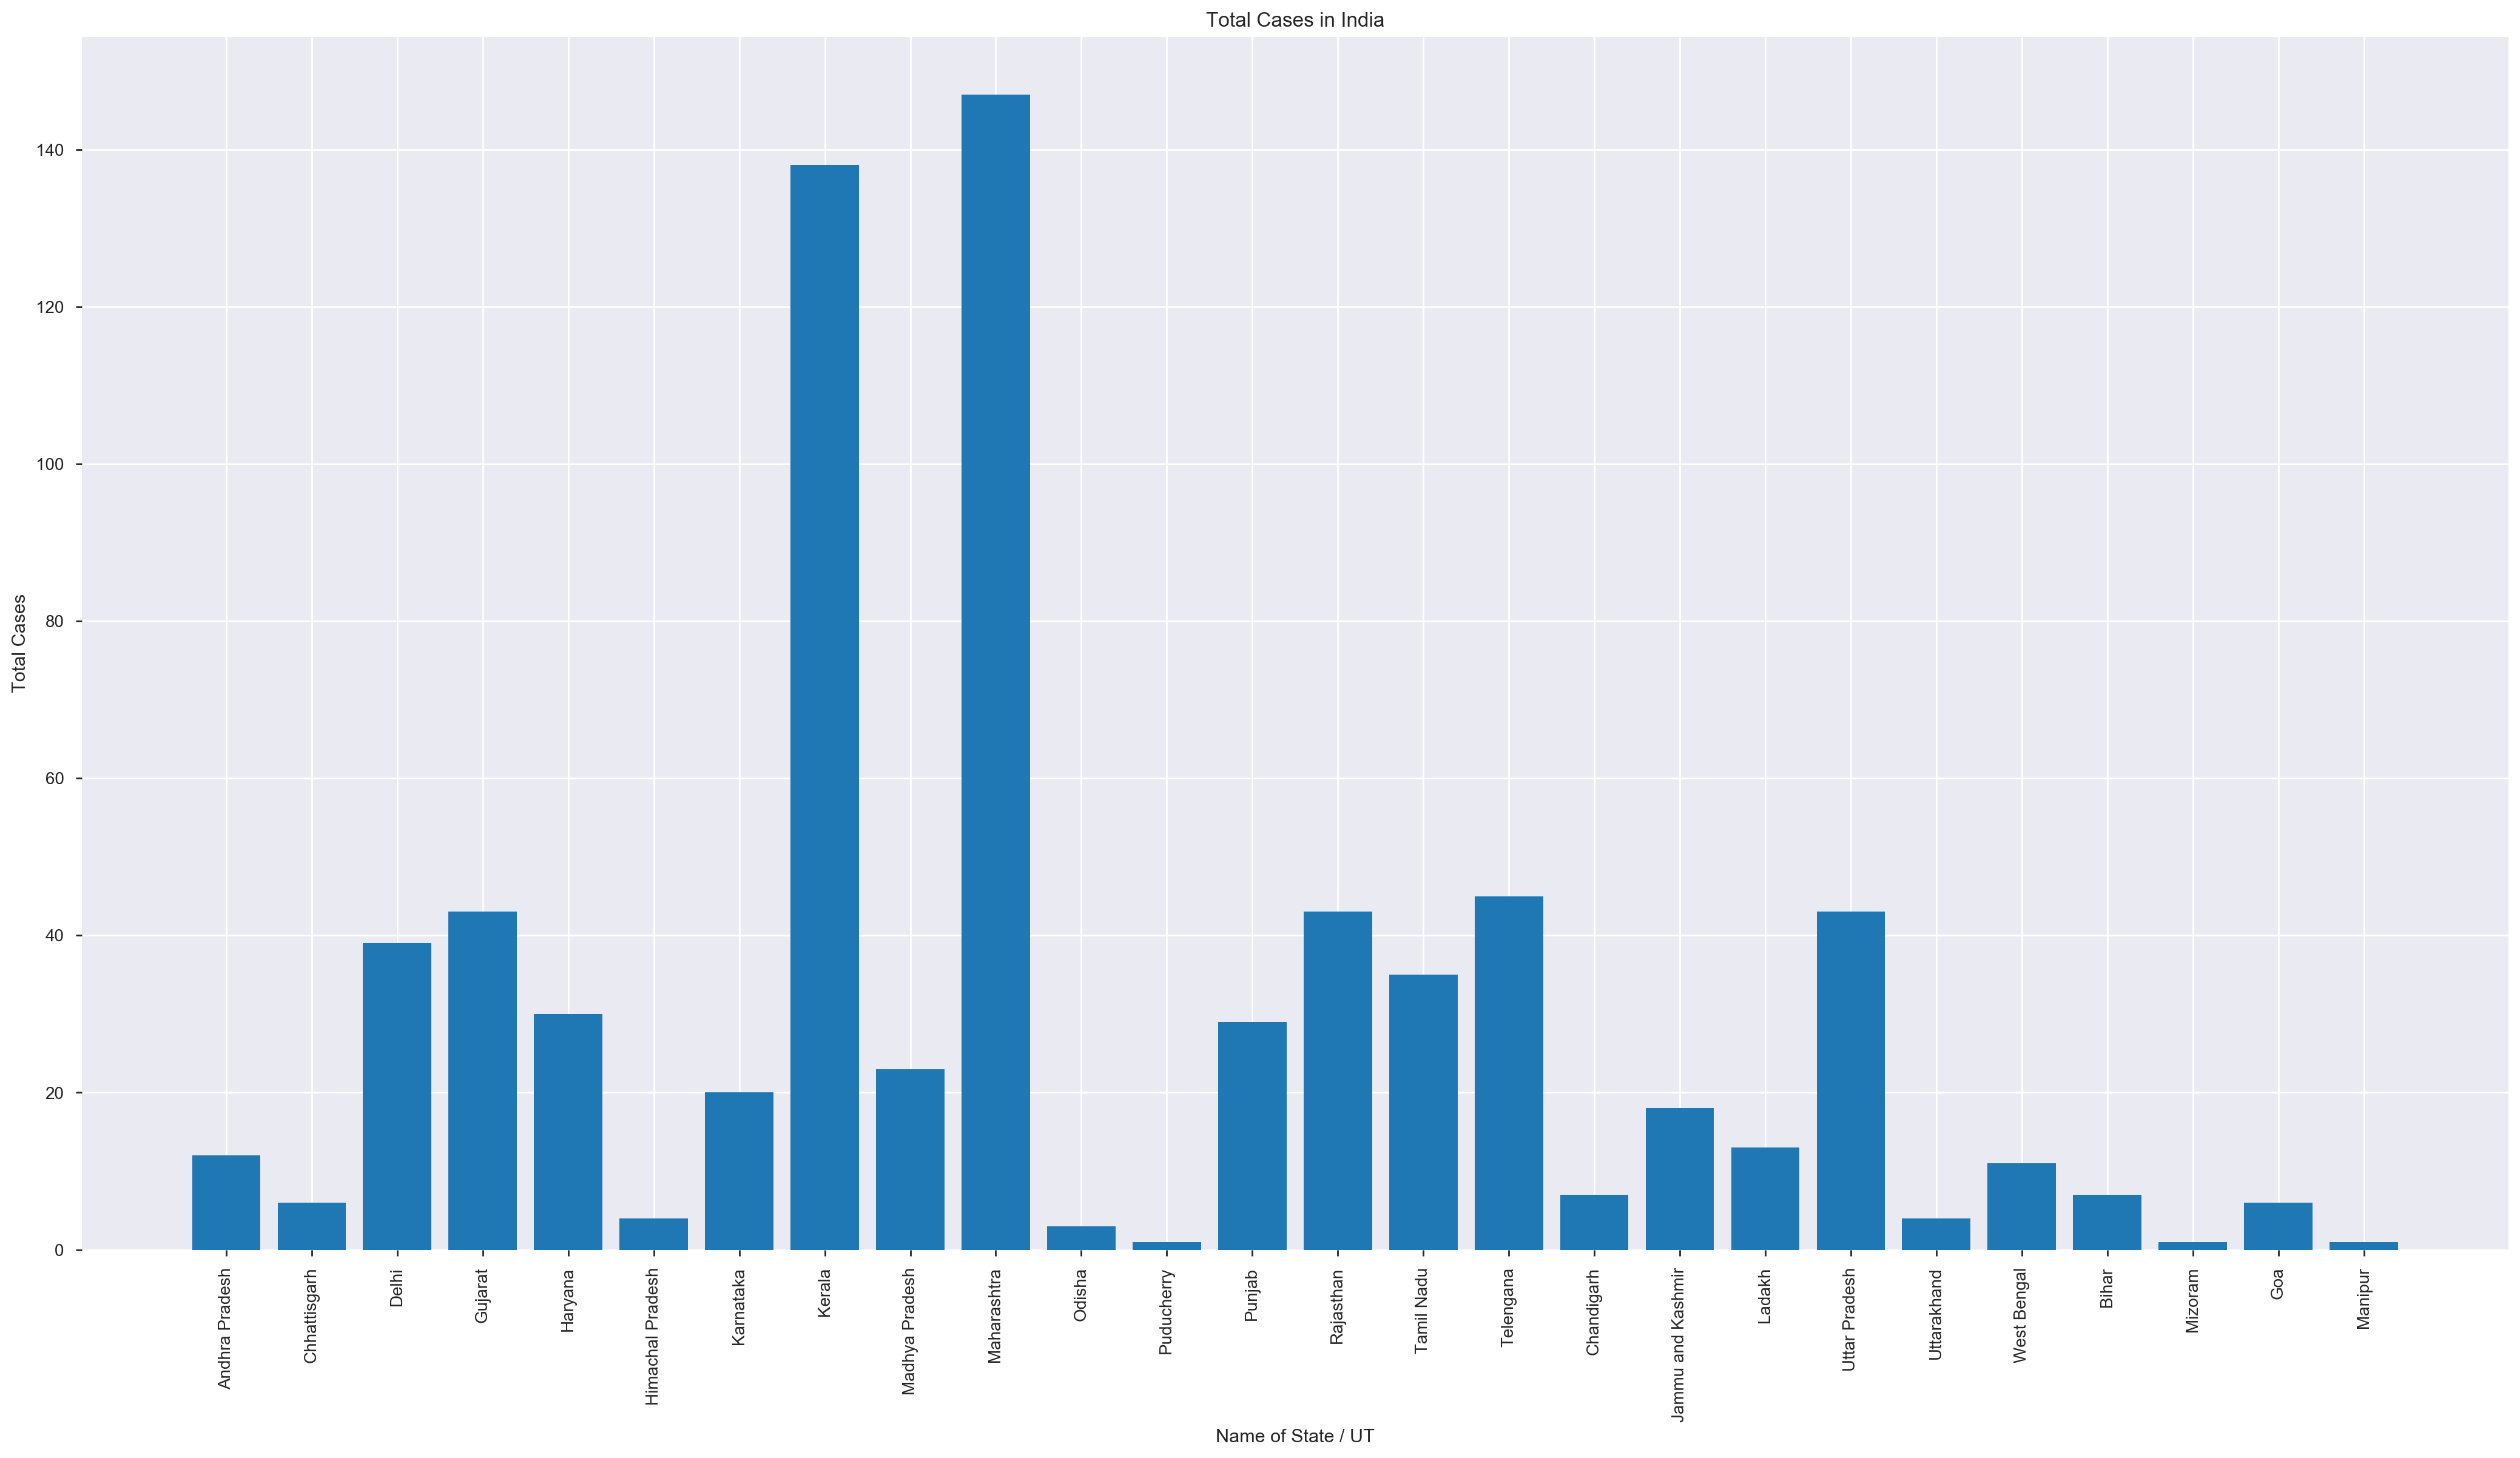

In [40]:
fig=plt.figure(figsize=(20,10),dpi=200)
axes=fig.add_axes([0,0,1,1])
axes.bar(i['Name of State / UT'],i['total_cases'])
axes.set_title("Total Cases in India")
axes.set_xlabel("Name of State / UT")
axes.set_ylabel("Total Cases")
plt.xticks(rotation=90)
plt.show()

In [41]:
Indian_cord =pd.read_excel(r"C:\Users\LENOVO\Downloads\Indian Coordinates.xlsx")
Indian_cord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [42]:
i_full = pd.merge(Indian_cord,i,on='Name of State / UT')

In [43]:
i_full

,Name of State / UT,Latitude,Longitude,S. No.,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,total_cases,activecases,Total_active_cases
0,Andhra Pradesh,14.750429,78.570026,1,12,0,1,0,12,11,128
1,Delhi,28.669993,77.230004,3,38,1,6,1,39,32,44
2,Haryana,28.450006,77.019991,5,16,14,11,0,30,19,40
3,Karnataka,12.570381,76.919997,7,20,0,3,2,20,15,32
4,Kerala,8.900373,76.569993,8,131,7,11,0,138,127,32
5,Maharashtra,19.250232,73.160175,10,144,3,15,4,147,128,22
6,Punjab,31.519974,75.980003,13,29,0,0,1,29,28,15
7,Rajasthan,26.449999,74.639981,14,41,2,3,0,43,40,13
8,Telengana,18.112400,79.019300,16,34,11,1,0,45,44,10
9,Tamil Nadu,12.920386,79.150042,15,32,3,1,1,35,33,11


In [44]:
import folium

In [45]:
map = folium.Map(location=[20,70],zoom_start= 4,tiles='Stamenterrain')
for lat,long,value, name in zip(i_full['Latitude'],i_full['Longitude'],i_full['total_cases'],i_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.2,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)

In [46]:
map

In [47]:
# How corona virus spreading globally
datewise_india = pd.read_excel(r"C:\Users\LENOVO\Downloads\per_day_cases.xlsx",parse_dates=True,sheet_name="India")
datewise_italy = pd.read_excel(r"C:\Users\LENOVO\Downloads\per_day_cases.xlsx",parse_dates=True,sheet_name="Italy")
datewise_korea = pd.read_excel(r"C:\Users\LENOVO\Downloads\per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
datewise_wuhan = pd.read_excel(r"C:\Users\LENOVO\Downloads\per_day_cases.xlsx",parse_dates=True,sheet_name="Wuhan")

In [48]:
datewise_india.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


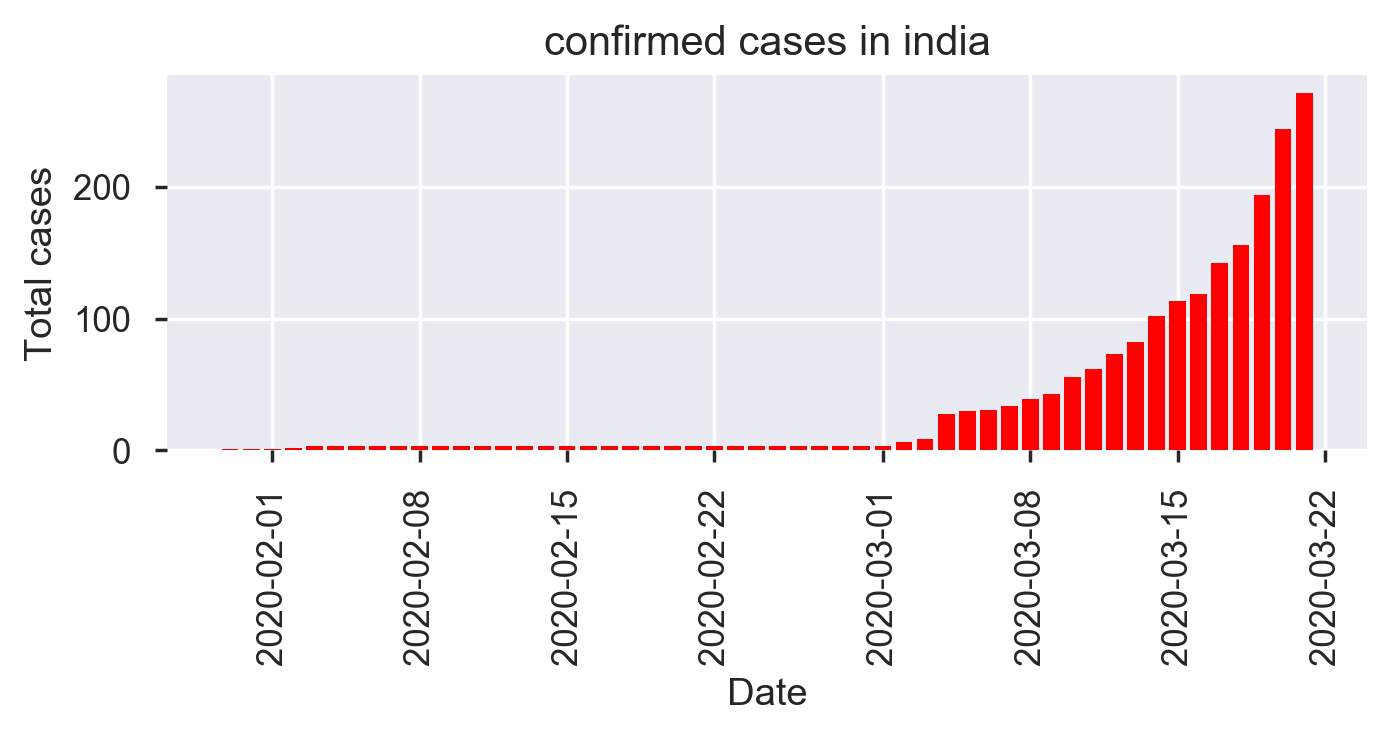

In [49]:
fig = plt.figure(figsize=(16,5),dpi=250) #here dpi is pixels
axes= fig.add_axes([0.1,0.1,0.3,0.3]) ## Getting axes means box
axes.bar(datewise_india['Date'],datewise_india['Total Cases'],color='Red')
axes.set_xlabel("Date")
axes.set_ylabel("Total cases")
plt.xticks(rotation=90)
axes.set_title("confirmed cases in india")
plt.show()

In [50]:
import plotly

In [51]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot, iplot

# init_notebook_mode(connected=True) 

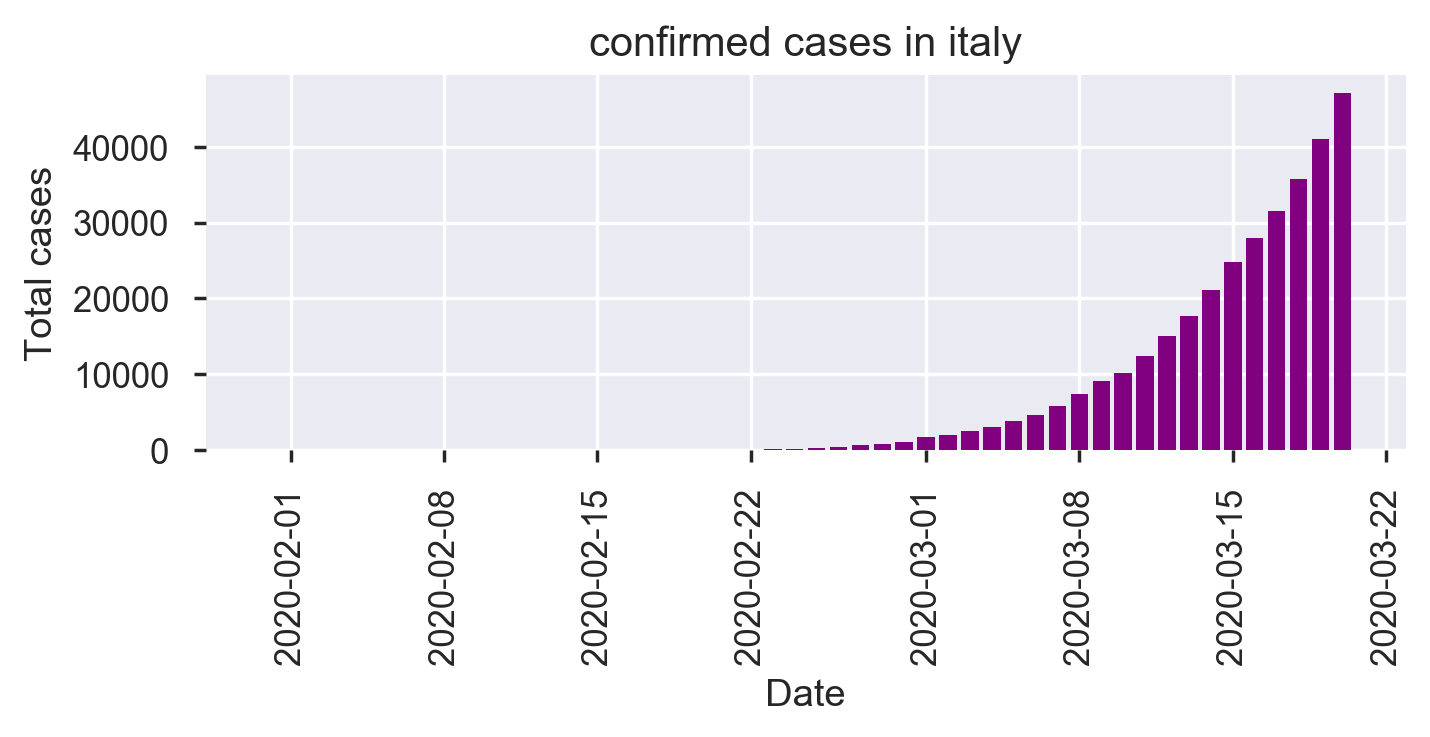

In [52]:
fig = plt.figure(figsize=(16,5),dpi=250) #here dpi is pixels
axes= fig.add_axes([0.1,0.1,0.3,0.3]) ## Getting axes means box
axes.bar(datewise_italy['Date'],datewise_italy['Total Cases'],color='purple')
axes.set_xlabel("Date")
axes.set_ylabel("Total cases")
plt.xticks(rotation=90)
axes.set_title("confirmed cases in italy")
plt.show()

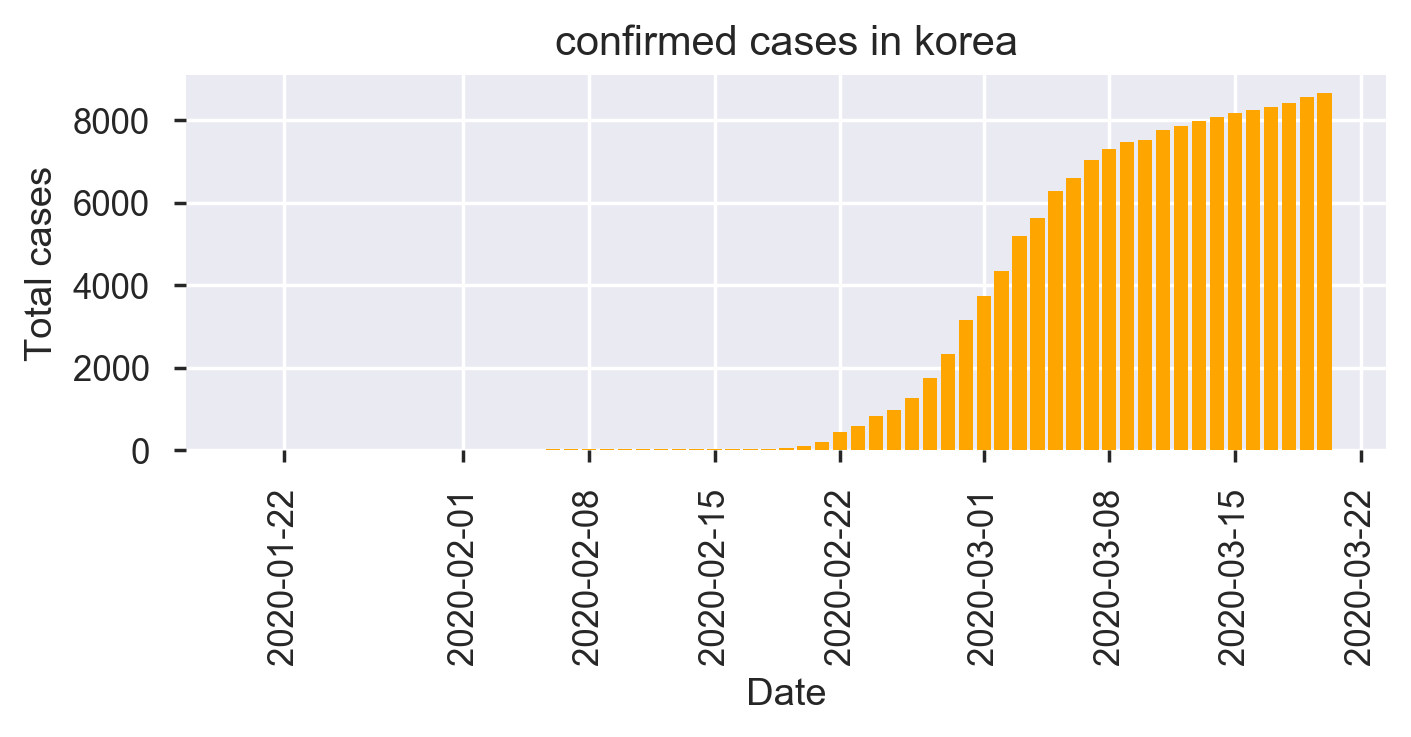

In [53]:
fig = plt.figure(figsize=(16,5),dpi=250) #here dpi is pixels
axes= fig.add_axes([0.1,0.1,0.3,0.3]) ## Getting axes means box
axes.bar(datewise_korea['Date'],datewise_korea['Total Cases'],color='Orange')
axes.set_xlabel("Date")
axes.set_ylabel("Total cases")
plt.xticks(rotation=90)
axes.set_title("confirmed cases in korea")
plt.show()

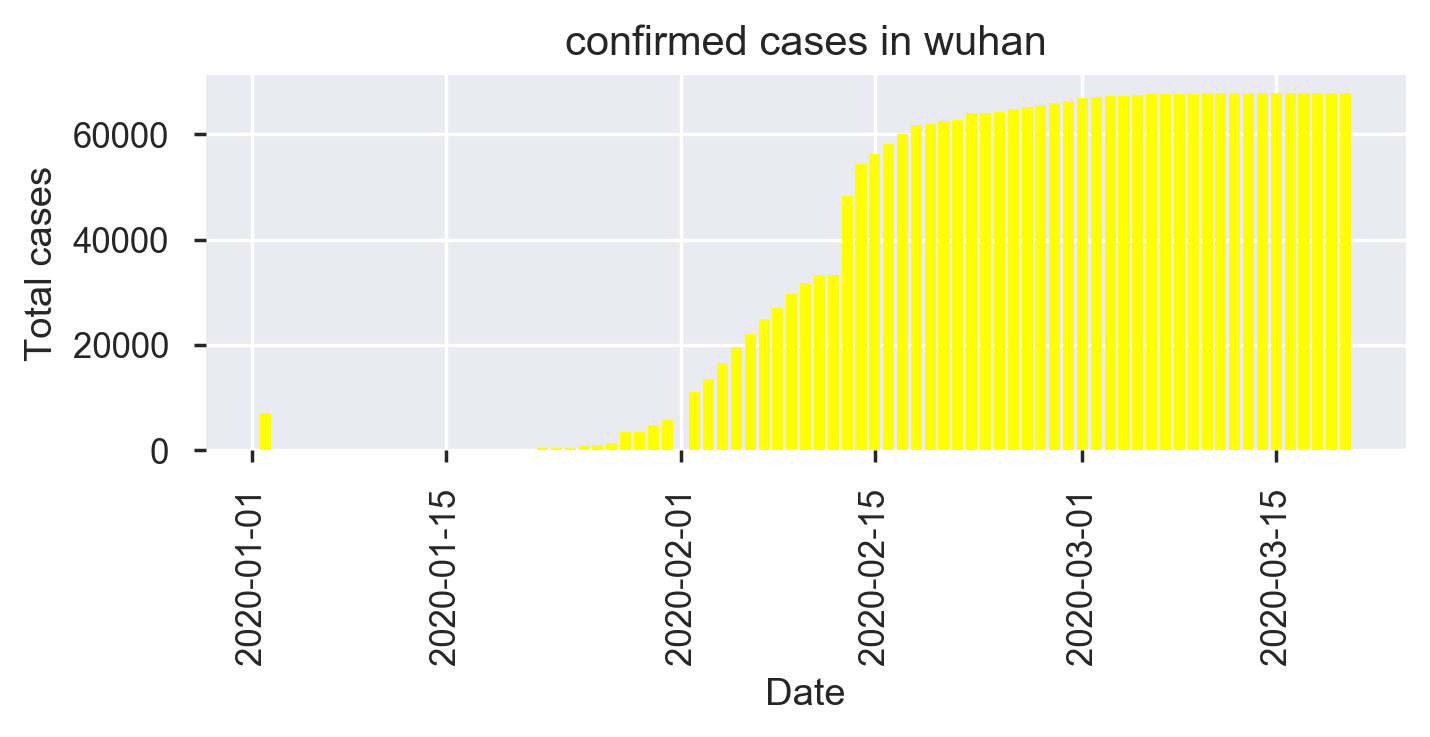

In [54]:
fig = plt.figure(figsize=(16,5),dpi=250) #here dpi is pixels
axes= fig.add_axes([0.1,0.1,0.3,0.3]) ## Getting axes means box
axes.bar(datewise_wuhan['Date'],datewise_wuhan['Total Cases'],color='yellow')
axes.set_xlabel("Date")
axes.set_ylabel("Total cases")
plt.xticks(rotation=90)
axes.set_title("confirmed cases in wuhan")
plt.show()

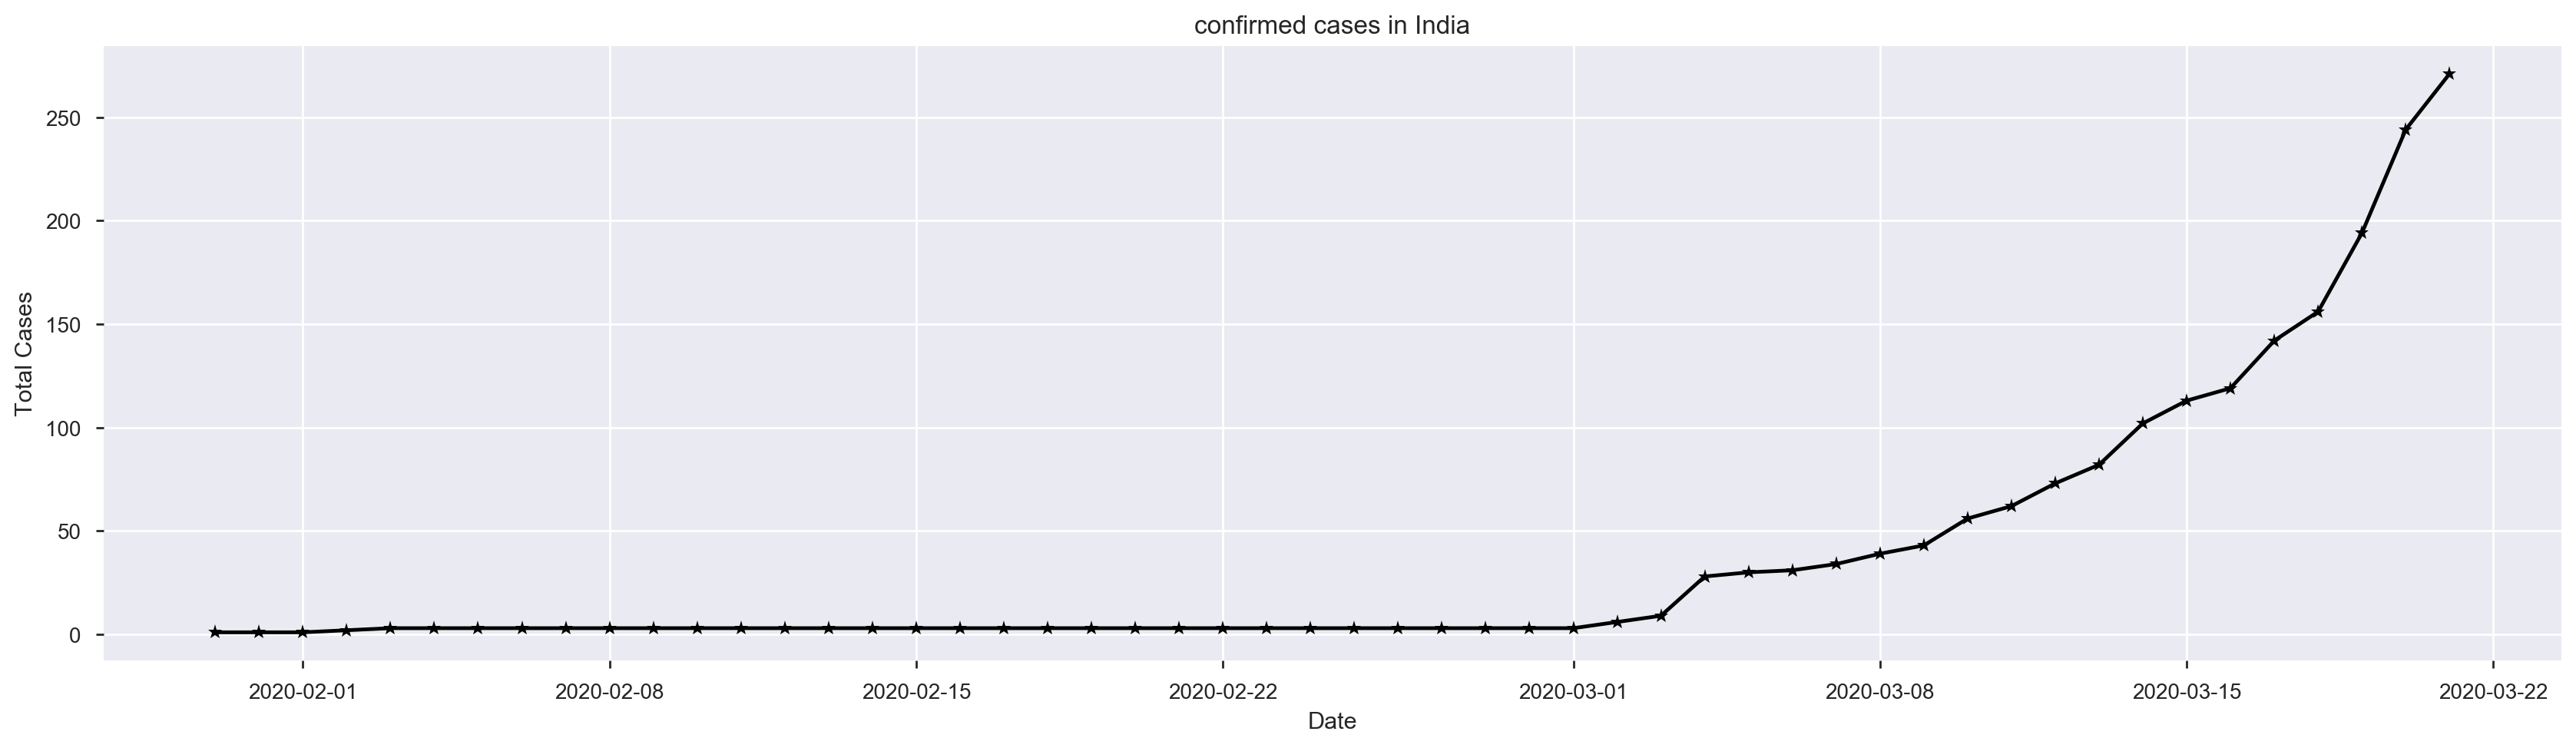

In [55]:
fig = plt.figure(figsize=(20,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(datewise_india["Date"],datewise_india["Total Cases"],color='Black',marker='*')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("confirmed cases in India")
plt.show()

In [56]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo 
from plotly.offline import init_notebook_mode,plot,iplot
from plotly.subplots import make_subplots

In [57]:

fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Bar(x=datewise_korea['Date'],y=datewise_korea['Total Cases'],
                    marker=dict(color=datewise_korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=datewise_italy['Date'],y=datewise_italy['Total Cases'],
                    marker=dict(color=datewise_italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=datewise_india['Date'],y=datewise_india['Total Cases'],
                    marker=dict(color=datewise_india['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=datewise_wuhan['Date'],y=datewise_wuhan['Total Cases'],
                    marker=dict(color=datewise_wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.write_html("fig.html",auto_open=True)

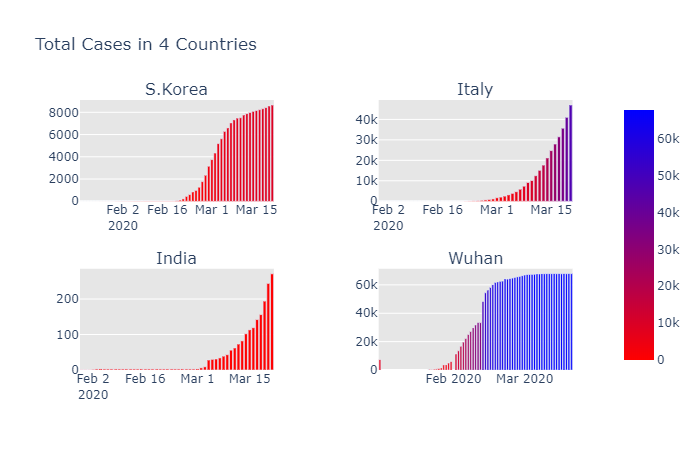

In [58]:
from IPython.display import Image
Image(filename=r"newplot.png")

In [59]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Scatter(x=datewise_korea['Date'],y=datewise_korea['Total Cases'],
                    marker=dict(color=datewise_korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Scatter(x=datewise_italy['Date'],y=datewise_italy['Total Cases'],
                    marker=dict(color=datewise_italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Scatter(x=datewise_india['Date'],y=datewise_india['Total Cases'],
                    marker=dict(color=datewise_india['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Scatter(x=datewise_wuhan['Date'],y=datewise_wuhan['Total Cases'],
                    marker=dict(color=datewise_wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.write_html("fig.html",auto_open=True)

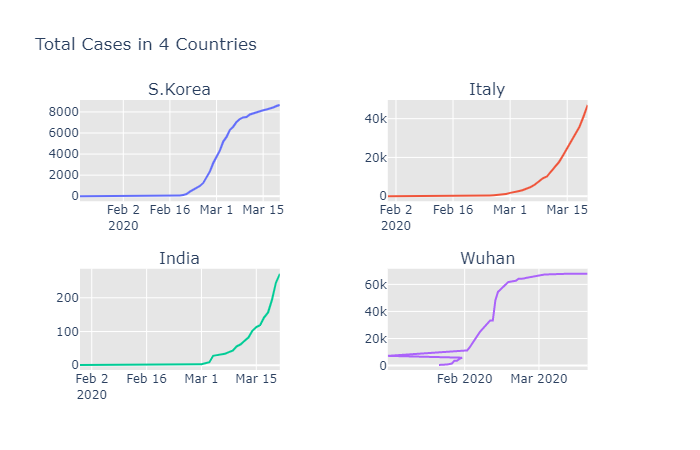

In [60]:
from IPython.display import Image
Image(filename="Scatter.png")

In [61]:
df = pd.read_csv("https://raw.githubusercontent.com/mona2401/COVID-19-Time-Series-Forecasting-with-Data-Analysis/master/covid_19_data.csv",parse_dates=['Last Update'])

In [62]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [63]:
df.rename(columns={'ObservationDate':'Date',
           'Country/Region':'Country'},inplace=True)

In [64]:
df.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [65]:
df.query('Country=="UK"')

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
481,482,01/31/2020,NaN,UK,2020-01-31 23:59:00,2.0,0.0,0.0
541,542,02/01/2020,NaN,UK,2020-02-01 01:52:00,2.0,0.0,0.0
611,612,02/02/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
678,679,02/03/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
746,747,02/04/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
817,818,02/05/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
888,889,02/06/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
957,958,02/07/2020,NaN,UK,2020-02-07 18:33:02,3.0,0.0,0.0
1029,1030,02/08/2020,NaN,UK,2020-02-07 18:33:02,3.0,0.0,0.0
1101,1102,02/09/2020,NaN,UK,2020-02-07 18:33:02,3.0,0.0,0.0


In [66]:
df.groupby('Date').sum()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
01/27/2020,12342,2927.0,82.0,61.0
01/28/2020,15262,5578.0,131.0,107.0
01/29/2020,18711,6165.0,133.0,126.0
01/30/2020,23345,8235.0,171.0,143.0


In [67]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
death = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [68]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'],y=recovered['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))
fig.write_html("Cases.html",auto_open=True)

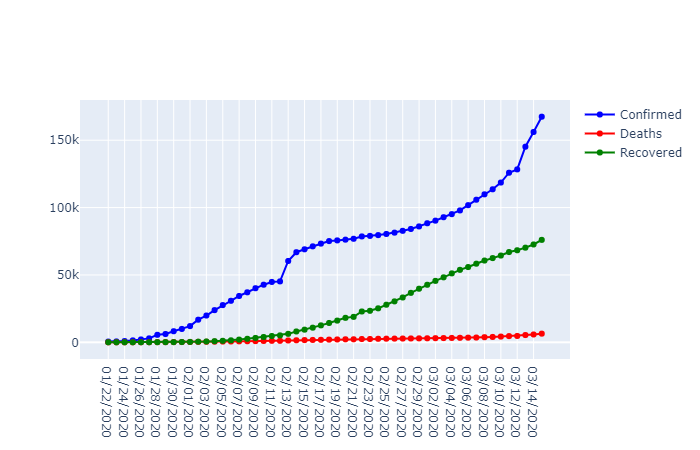

In [69]:
from IPython.display import Image
Image(filename="Cases.png")

In [70]:
df_confirmed = pd.read_csv("https://raw.githubusercontent.com/mona2401/COVID-19-Time-Series-Forecasting-with-Data-Analysis/master/time_series_covid_19_confirmed.csv")

In [71]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [72]:
df_confirmed.rename(columns={"Country/Region":"Country"},inplace=True)

In [73]:
df_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [74]:
df_latlong=pd.merge(df,df_confirmed,on=['Country','Province/State'])

In [90]:
df_latlong.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
2,118,01/24/2020,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
3,159,01/25/2020,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
4,203,01/26/2020,Washington,US,2020-01-26 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572


In [92]:
fig=px.density_mapbox(df_latlong,lat="Lat",lon="Long",hover_name="Province/State",hover_data=["Confirmed","Deaths","Recovered"],animation_frame="Date",color_continuous_scale="Portland",radius=7,zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("worldwide cases.html",auto_open=True)

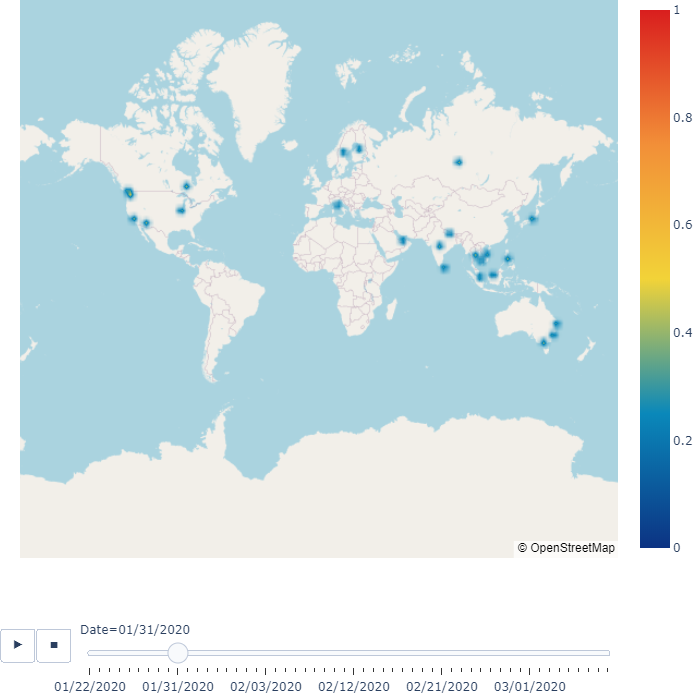

In [82]:
from IPython.display import Image
Image(filename="Growing corona.png,Grew.")

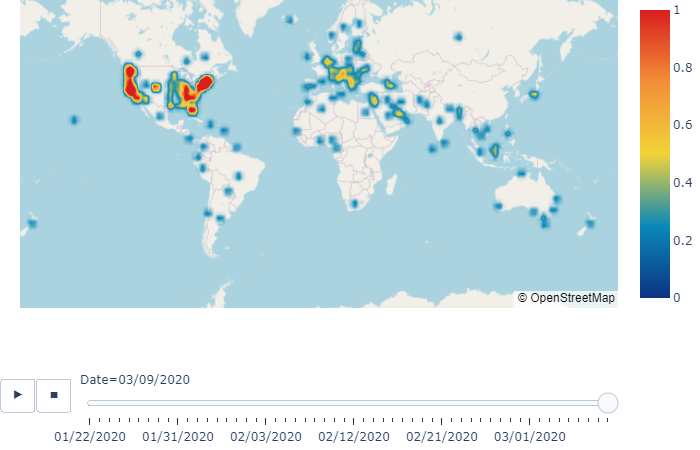

In [83]:
from IPython.display import Image
Image(filename="Grew.png")